# OCVX

In [281]:
import numpy as np
from scipy.optimize import minimize

## 1. Descente de gradient sans contrainte

In [335]:
# hessian for ax^2 + bx^2
def hessian(x):
    return np.array([[2 * x[0], 0],
                     [0 , 2 * x[1]]])

In [336]:
def objective():
    A = np.abs(np.random.randn(2))
    assert(np.linalg.cond(hessian(A)) >= 1)
    return (A, np.linalg.cond(hessian(A)))

In [337]:
objectives = [(np.array([i, 1.0]), np.linalg.cond(hessian([i, 1.0]))) for i in range(1, 10)]

In [364]:
def gradient_descentL2(A, lr = 0.1):
    x = np.array([1.0, 1.0])
    it = 0
    while x[0] > 0.00001 and x[1] > 0.00001:
        dx0 = 2 * A[0] * x[0]
        dx1 = 2 * A[1] * x[1]
        x[0] -= lr * dx0
        x[1] -= lr * dx1
        it += 1
    return it

In [369]:
resl2 = np.array([[x[1], gradient_descentL2(x[0], 0.1)] for x in objectives])

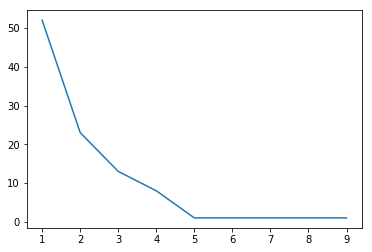

In [370]:
import matplotlib.pyplot as plt
plt.plot(resl2[:,0], resl2[:,1])
plt.show()

In [371]:
def gradient_descentL1(A, lr = 0.1):
    x = np.array([1.0, 1.0])
    it = 0
    while x[0] > 0.00001 and x[1] > 0.00001:
        dx0 = 2 * A[0] * x[0]
        dx1 = 2 * A[1] * x[1]
        
        if x[0] > x[1]:
            x[0] -= lr * dx0
        else:
            x[1] -= lr * dx1
        it += 1
    return it

In [378]:
resl1 = np.array([[x[1], gradient_descentL1(x[0], 0.03)] for x in objectives])

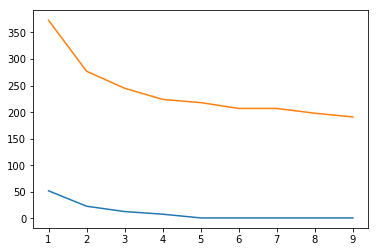

In [379]:
import matplotlib.pyplot as plt
plt.plot(resl2[:,0], resl2[:,1])
plt.plot(resl1[:,0], resl1[:,1])
plt.show()